# Question 6



 In this case first we set up the equations for this finite quantum well. We divide the region into 3 parts, part I , part II and part III on the basis of x axis. part 1 from $-\infty \rightarrow -w/2$, part II from $-w/2 \rightarrow w/2$, and part III from $w/2 \rightarrow \infty$ 


 In the part I and III we have thscrodinger equation to be:
 $$\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}=(V-E)\psi \implies \psi = Ae^{\alpha x} + Be^{-\alpha x}$$

 where, $\alpha= \sqrt{\frac{2m(V-E)}{\hbar^2}}$, now we do not want the solution to blow up, meaning one of A=0 for positive x and B=0 for negative x.

 In the region 2 we have the equation to be:  

 $$\frac{-\hbar^2}{2m}\frac{d^2\psi}{dx^2}=E\psi \implies \psi = Asinkx +Bcoskx$$

 where $k=\sqrt{\frac{2mE}{\hbar^2}}$. Now, the general solution looks like:

 $$\psi= \begin{cases} Ae^{\alpha x} & \text{region I}\\
 C sinkx + D coskx & \text{region II}\\
 Be^{-\alpha x} & \text{region III}\\
 \end{cases}$$

 from the symmetry of the given problem, we can easily see that the problem is divided into 2 cases, symmetric and anti-symmetric.

 **Symmetric**

 Here, A=B and thus C=0, the odd sin term vanishes and only the cos term is left behind. So, at w/2 we can have the boundary conditions of the continuity and differentiability of the wave functions, giving rise to two equations:

 $$Ae^{\frac{-\alpha w}{2}}=D cos(\frac{kw}{2})$$
 $$A\frac{-\alpha w}{2}e^{\frac{-\alpha w}{2}}=\frac{-Dkw}{2} sin(\frac{kw}{2})$$

 If we divide the first equation by the second we get: 

 $$ktan(\frac{kw}{2})=\alpha$$

 **Anti-Symmetric**

 A=-B and the sin term survives.

  $$-Ae^{\frac{-\alpha w}{2}}=C sin(\frac{kw}{2})$$
 $$-A\frac{-\alpha w}{2}e^{\frac{-\alpha w}{2}}=\frac{Ckw}{2} cos(\frac{kw}{2})$$

 giving rise to: 

  $$kcot(\frac{kw}{2})=-\alpha$$

**Setting up the final equation**
We have $$k^2 +\alpha^2 = \frac{2mV}{\hbar^2}$$

To eliminate the dimensionality, we define $\frac{kw}{2}=k'$ and $a' = \frac{\alpha w}{2}$, which means:

$$k'^2 +\alpha'^2 = \frac{mVw^2}{2\hbar^2}=s^2$$

The final equation reads:

$$a' = \begin{cases} k'tank' & \text{symmetric}\\
-k'cotk' & \text{anti-symmetric}\\
\end{cases}= \sqrt{s^2 - k'^2}$$

$$\implies k' =\begin{cases} \sqrt{s^2- k'^2}cotk' & \text{symmetric}\\
-\sqrt{s^2- k'^2}tank' & \text{anti-symmetric}\\ \end{cases}$$

After k has been found we can write:
$$k' =\frac{kw}{2}=\frac{w}{2}\sqrt{\frac{2mE}{\hbar^2}} = \frac{w}{\hbar}\sqrt{\frac{mE}{2}} \\ \implies E = \frac{2\hbar^2k'^2}{mw^2}$$



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


# we first plot the functions to get an idea of the roots
m=9.1094e-31
w=1e-9
V=20*(1.602e-19)
h=6.626e-34
hbar=(h/(2*math.pi))

s=math.sqrt((m*V*w**2)/(2*hbar**2))
print(s)

11.455250193134239


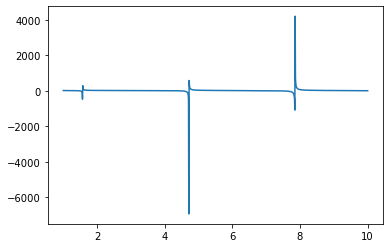

In [3]:
x=np.linspace(1, 10, 1000)
#symmetric case
y_sym=[]
n=len(x)
for i in range(n):
    y_sym.append(math.sqrt(s**2-x[i]**2)-x[i]*np.tan(x[i]))
plt.plot(x, y_sym)
#plt.plot(x, np.zeros(n))



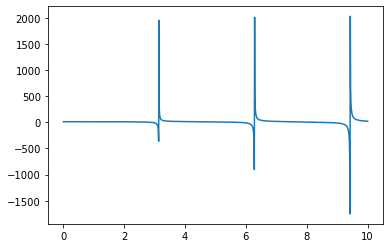

In [4]:
x=np.linspace(0.0001,10,1000)
#anti-symmetric case
y_anti=[]
n=len(x)
for i in range(n):
    y_anti.append(math.sqrt(s**2-x[i]**2)+x[i]/np.tan(x[i]))
plt.plot(x, y_anti)

So, clearly the first six energy states come from both symmetric and annti-symmetric states, 3 frm each. But in this case we see that, the roots have weird behaviour near these which can cause peoblems in convergence. So, we modify the code a little bit to guess better the positions of teh roots.


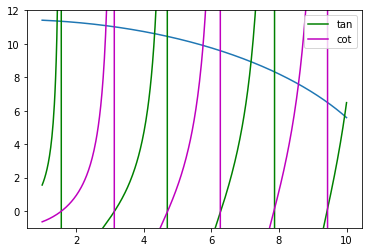

In [5]:
circle=[]
tan=[]
cot=[]
x=np.linspace(1, 10, 500)
n=len(x)
for i in range(0, n):
    circle.append(math.sqrt(s**2-x[i]**2))
    tan.append(((x[i]*np.tan(x[i]))))
    cot.append(((-x[i]/np.tan(x[i]))))

plt.plot(x,circle)
plt.plot(x,tan,'g', label='tan')
plt.plot(x, cot, 'm', label='cot')
plt.ylim(-1,12)
plt.legend()

In [11]:
def sym(s,x):
    return math.sqrt(s**2-x**2)-x*math.tan(x)

def anti(s,x):
    return math.sqrt(s**2-x**2)+x/math.tan(x)


def f_p(f, s, l, r, tol):
    left=l
    right=r
    L=f(s, left)
    R=f(s, right)
    if(L*R>0):
        return 99999
    else:
        for i in range (1000):
            middle=(left*R-L*right)/(R-L)
            M=f(s, middle)
            if(L*M<0):
                right=middle
                R=M
            if(L*M>0):
                left=middle
                L=M
            if(L*M==0):
                left=middle
                right=middle
            if(right-left<tol):
                break
    return middle


#clearly, the roots of the symmetric cases are near, 1.4, 4.3, 7.2
#anti symmetric cases are 2.9, 5.7, 8.6
print('symmetric cases are:')
print(f_p(sym, s, 1.4, 1.47, 1e-10))
print(f_p(sym, s, 4.2, 4.4, 1e-10))
print(f_p(sym, s, 7.1, 7.3, 1e-10))


print('anti-symmetric cases are:')
print(f_p(anti, s, 2.8, 3, 1e-10))
print(f_p(anti, s, 5.6, 5.8, 1e-10))
print(f_p(anti, s, 8.5, 8.7, 1e-10))

m=9.1094e-31
w=1e-9
V=20*(1.602e-19)
h=6.626e-34
hbar=(h/(2*math.pi))



symmetric cases are:
1.444371638163278
4.325213208375796
7.176905644548641
anti-symmetric cases are:
2.8868360602404914
5.756657550798395
8.578430845689619


In [10]:
m=9.1094e-31
w=1e-9
V=20*(1.602e-19)
h=6.626e-34
hbar=(h/(2*math.pi))
mult=((2*hbar**2)/(m*w**2))/(1.6e-19)

#Now, we calculate the respective energies


#symmetric cases
sy=np.zeros(3)
sy[0]=(f_p(sym, s, 1.4, 1.47, 1e-10))
sy[1]=f_p(sym, s, 4.2, 4.4, 1e-10)
sy[2]=(f_p(sym, s, 7.1, 7.3, 1e-10))

#anti-stmmetric cases
a=np.zeros(3)
a[0]=f_p(anti, s, 2.8, 3, 1e-10)
a[1]=(f_p(anti, s, 5.6, 5.8, 1e-10))
a[2]=(f_p(anti, s, 8.5, 8.7, 1e-10))

for i in range(3):
    sy[i]=sy[i]**2*mult
    a[i]=a[i]**2*mult


print('symmetric case energies are(eV):', sy)
print('anti-symmetric case energies are(eV):', a)





symmetric case energies are(eV): [0.31836203 2.85481788 7.8602768 ]
anti-symmetric case energies are(eV): [ 1.27176717  5.05713046 11.22998241]
